# PROBLEM STATEMENT

 #There are times when a user writes Good, Nice App or any other positive text, in the review and gives 1-star rating. Your goal is to identify the reviews where the semantics of review text does not match rating. 

#Your goal is to identify such ratings where review text is good, but rating is negative- so that the support team can point this to users. 


# Importing Libraries

In [345]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [346]:
import warnings
warnings.filterwarnings("ignore")

# Reading the Dataset

In [347]:
df=pd.read_csv("chrome_reviews.csv")
df.head()

,ID,Review URL,Text,Star,Thumbs Up,User Name,Developer Reply,Version,Review Date,App ID
0,3886,https://play.google.com/store/apps/details?id=...,This is very helpfull aap.,5,0,INDIAN Knowledge,NaN,83.0.4103.106,2020-12-19,com.android.chrome
1,3887,https://play.google.com/store/apps/details?id=...,Good,3,2,Ijeoma Happiness,NaN,85.0.4183.127,2020-12-19,com.android.chrome
2,3888,https://play.google.com/store/apps/details?id=...,Not able to update. Neither able to uninstall.,1,0,Priti D BtCFs-29,NaN,85.0.4183.127,2020-12-19,com.android.chrome
3,3889,https://play.google.com/store/apps/details?id=...,Nice app,4,0,Ajeet Raja,NaN,77.0.3865.116,2020-12-19,com.android.chrome
4,3890,https://play.google.com/store/apps/details?id=...,Many unwanted ads,1,0,Rams Mp,NaN,87.0.4280.66,2020-12-19,com.android.chrome


In [348]:
pd.set_option("display.max_columns",None)
display(df.head())

,ID,Review URL,Text,Star,Thumbs Up,User Name,Developer Reply,Version,Review Date,App ID
0,3886,https://play.google.com/store/apps/details?id=...,This is very helpfull aap.,5,0,INDIAN Knowledge,NaN,83.0.4103.106,2020-12-19,com.android.chrome
1,3887,https://play.google.com/store/apps/details?id=...,Good,3,2,Ijeoma Happiness,NaN,85.0.4183.127,2020-12-19,com.android.chrome
2,3888,https://play.google.com/store/apps/details?id=...,Not able to update. Neither able to uninstall.,1,0,Priti D BtCFs-29,NaN,85.0.4183.127,2020-12-19,com.android.chrome
3,3889,https://play.google.com/store/apps/details?id=...,Nice app,4,0,Ajeet Raja,NaN,77.0.3865.116,2020-12-19,com.android.chrome
4,3890,https://play.google.com/store/apps/details?id=...,Many unwanted ads,1,0,Rams Mp,NaN,87.0.4280.66,2020-12-19,com.android.chrome


# Performing EDA

In [349]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7204 entries, 0 to 7203
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ID               7204 non-null   int64 
 1   Review URL       7204 non-null   object
 2   Text             7203 non-null   object
 3   Star             7204 non-null   int64 
 4   Thumbs Up        7204 non-null   int64 
 5   User Name        7204 non-null   object
 6   Developer Reply  95 non-null     object
 7   Version          7119 non-null   object
 8   Review Date      7204 non-null   object
 9   App ID           7204 non-null   object
dtypes: int64(3), object(7)
memory usage: 562.9+ KB


In [350]:
df.isnull().sum()

ID                    0
Review URL            0
Text                  1
Star                  0
Thumbs Up             0
User Name             0
Developer Reply    7109
Version              85
Review Date           0
App ID                0
dtype: int64

In [351]:
# retaining the neccesary columns for easy processing purpose
df1=df[["Text","Star"]]
df1.head()

,Text,Star
0,This is very helpfull aap.,5
1,Good,3
2,Not able to update. Neither able to uninstall.,1
3,Nice app,4
4,Many unwanted ads,1


In [352]:
# check for the null values in this columns
df1.isnull().sum()

Text    1
Star    0
dtype: int64

In [353]:
df1.shape

(7204, 2)

In [354]:
df2=df1.dropna()
df2

,Text,Star
0,This is very helpfull aap.,5
1,Good,3
2,Not able to update. Neither able to uninstall.,1
3,Nice app,4
4,Many unwanted ads,1
...,...,...
7199,Bagusss..,5
7200,Bad version 😔,1
7201,One thing that I have to say I can't spelled t...,5
7202,Excellent,5


In [355]:
df2.shape

(7203, 2)

# Data Processing using NLTK

In [356]:
#import natural Language Processing tool
import nltk
import re
from nltk.corpus import stopwords
stop=stopwords.words("English")

# Data Cleaning

In [357]:
# data cleaning
import string
def clean_reviews(Text):
    Text=re.sub('\[.*?\]','',str(Text))
    Text=re.sub('[%s]'%re.escape(string.punctuation),'',str(Text))
    Text=re.sub('\w*\d\w*','',str(Text))
    Text = re.sub("[0-9" "]+"," ",str(Text))
    Text = re.sub('[‘’“”…]', '', str(Text))
    Text=re.sub('https:\ $',' ',str(Text))
    Text=re.sub(" _'_ ",' ',str(Text))
    Text = re.sub('a{3}','',Text)
    Text=re.sub("[^A-Za-z" "]+"," ",Text).lower()
    return(Text)
clean=lambda x : clean_reviews(x)

In [358]:
df2["Text"]=df2.Text.apply(clean)
df2

,Text,Star
0,this is very helpfull aap,5
1,good,3
2,not able to update neither able to uninstall,1
3,nice app,4
4,many unwanted ads,1
...,...,...
7199,bagusss,5
7200,bad version,1
7201,one thing that i have to say i cant spelled to...,5
7202,excellent,5


# Stopwords Removing

In [359]:
# lets remove stopwords
from nltk.corpus import stopwords
stop=stopwords.words('english')
df2['Text_cleaned']=df2['Text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df2['stopwords']= df2['Text'].apply(lambda x: len([x for x in x.split() if x in stop]))
df2.head()


,Text,Star,Text_cleaned,stopwords
0,this is very helpfull aap,5,helpfull aap,3
1,good,3,good,0
2,not able to update neither able to uninstall,1,able update neither able uninstall,3
3,nice app,4,nice app,0
4,many unwanted ads,1,many unwanted ads,0


In [360]:
df2["Length"] = df2["Text"].apply(lambda x:len(str(x)))

#lets do lemmatatinzation

In [361]:

from textblob import Word

df2['Text']=df2['Text'].apply(lambda x: ' '.join([Word(word).lemmatize() for word in x.split()]))


In [362]:
df2.head()

,Text,Star,Text_cleaned,stopwords,Length
0,this is very helpfull aap,5,helpfull aap,3,25
1,good,3,good,0,4
2,not able to update neither able to uninstall,1,able update neither able uninstall,3,44
3,nice app,4,nice app,0,8
4,many unwanted ad,1,many unwanted ads,0,17


# Using Textblob

In [1]:
# lets calculate the subjectivity,polarity, positve and negative reviews
import textblob
from textblob import TextBlob

In [364]:
def sentimental_analysis(df2):
    sentiment=TextBlob(df2['Text_cleaned']).sentiment
    return pd.Series([sentiment.subjectivity,sentiment.polarity])
df2[['subjectivity_textblob','polarity_textblob']]=df2.apply(sentimental_analysis,axis=1)
df2.head()

,Text,Star,Text_cleaned,stopwords,Length,subjectivity_textblob,polarity_textblob
0,this is very helpfull aap,5,helpfull aap,3,25,0.000,0.0
1,good,3,good,0,4,0.600,0.7
2,not able to update neither able to uninstall,1,able update neither able uninstall,3,44,0.625,0.5
3,nice app,4,nice app,0,8,1.000,0.6
4,many unwanted ad,1,many unwanted ads,0,17,0.500,0.5


In [365]:
def analysis_score(score):
    if score >0:
        return("positive_score")
    elif score==0:
        return("Netural_score")
    else:
        return("Negative_score")

In [366]:
df2['analysis_sentence']=df2['polarity_textblob'].apply(analysis_score)
from sklearn.preprocessing import LabelEncoder
lm=LabelEncoder()
df2['analysis_sentence']=lm.fit_transform(df2['analysis_sentence'])
df2.head()

,Text,Star,Text_cleaned,stopwords,Length,subjectivity_textblob,polarity_textblob,analysis_sentence
0,this is very helpfull aap,5,helpfull aap,3,25,0.000,0.0,1
1,good,3,good,0,4,0.600,0.7,2
2,not able to update neither able to uninstall,1,able update neither able uninstall,3,44,0.625,0.5,2
3,nice app,4,nice app,0,8,1.000,0.6,2
4,many unwanted ad,1,many unwanted ads,0,17,0.500,0.5,2


In [367]:
df2.analysis_sentence.value_counts()

2    3950
1    2536
0     717
Name: analysis_sentence, dtype: int64

In [368]:
labels=["positive","Negative","Neutral"]

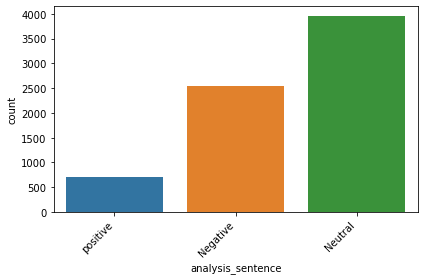

In [369]:
import seaborn as sns
ax=sns.countplot(x="analysis_sentence",data=df2)
ax.set_xticklabels(labels,rotation=45,ha="right")
plt.tight_layout()
plt.show()

# Using Vader_Lexicon

In [370]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Hp\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [371]:
df_vader=df2

In [372]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
SIA=SentimentIntensityAnalyzer()
df_vader['sentiments_vader']=df_vader['Text_cleaned'].apply(lambda x:SIA.polarity_scores(x))
#df_vader=pd.concat([df_vader.drop(['sentiments_vader'],axis=1),df_vader['sentiments_vader'].apply(pd.Series)],axis=1)

In [340]:
df_vader.head()

,Text,Star,Text_cleaned,stopwords,Length,subjectivity_textblob,polarity_textblob,analysis_sentence,neg,neu,pos,compound,Vader_Score,Vader_Compound_Score,Result
0,this is very helpfull aap,5,helpfull aap,3,25,0.000,0.0,1,0.000,1.000,0.000,0.0000,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neutral
1,good,3,good,0,4,0.600,0.7,2,0.000,0.000,1.000,0.4404,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...",0.4404,positive
2,not able to update neither able to uninstall,1,able update neither able uninstall,3,44,0.625,0.5,2,0.000,1.000,0.000,0.0000,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neutral
3,nice app,4,nice app,0,8,1.000,0.6,2,0.000,0.263,0.737,0.4215,"{'neg': 0.0, 'neu': 0.263, 'pos': 0.737, 'comp...",0.4215,positive
4,many unwanted ad,1,many unwanted ads,0,17,0.500,0.5,2,0.487,0.513,0.000,-0.2263,"{'neg': 0.487, 'neu': 0.513, 'pos': 0.0, 'comp...",-0.2263,negative


In [324]:
#df_vader["Vader_Score"] = df_vader["Text_cleaned"].apply(lambda x:SIA.polarity_scores(x))

In [373]:
# analayisi the neu ,negative,pos of the vader_lexicon
df_vader["Vader_Compound_Score"]  = df_vader['sentiments_vader'].apply(lambda score_dict: score_dict['compound'])

In [374]:
df_vader["Result"] = df_vader["Vader_Compound_Score"].apply(lambda c: 'positive' if c > 0 else ('negative' if c < 0 else 'neutral'))
df_vader.head()

,Text,Star,Text_cleaned,stopwords,Length,subjectivity_textblob,polarity_textblob,analysis_sentence,sentiments_vader,Vader_Compound_Score,Result
0,this is very helpfull aap,5,helpfull aap,3,25,0.000,0.0,1,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neutral
1,good,3,good,0,4,0.600,0.7,2,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...",0.4404,positive
2,not able to update neither able to uninstall,1,able update neither able uninstall,3,44,0.625,0.5,2,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neutral
3,nice app,4,nice app,0,8,1.000,0.6,2,"{'neg': 0.0, 'neu': 0.263, 'pos': 0.737, 'comp...",0.4215,positive
4,many unwanted ad,1,many unwanted ads,0,17,0.500,0.5,2,"{'neg': 0.487, 'neu': 0.513, 'pos': 0.0, 'comp...",-0.2263,negative


In [375]:
df_vader[["Result"]].value_counts()

Result  
positive    4001
neutral     2409
negative     793
dtype: int64

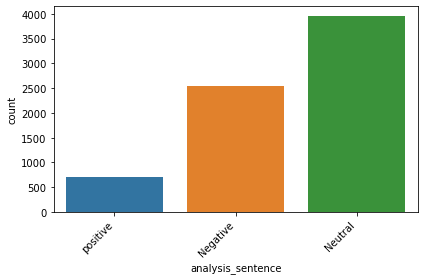

In [376]:
import seaborn as sns
ax=sns.countplot(x="analysis_sentence",data=df2)
ax.set_xticklabels(labels,rotation=45,ha="right")
plt.tight_layout()
plt.show()

In [377]:
#needs to be looked at
df_vader_observe=df_vader[df_vader.Result=="positive"]
df_vader_observe.head()

,Text,Star,Text_cleaned,stopwords,Length,subjectivity_textblob,polarity_textblob,analysis_sentence,sentiments_vader,Vader_Compound_Score,Result
1,good,3,good,0,4,0.6,0.7,2,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...",0.4404,positive
3,nice app,4,nice app,0,8,1.0,0.6,2,"{'neg': 0.0, 'neu': 0.263, 'pos': 0.737, 'comp...",0.4215,positive
5,this app good,4,app good,1,13,0.6,0.7,2,"{'neg': 0.0, 'neu': 0.256, 'pos': 0.744, 'comp...",0.4404,positive
6,yes yes,5,yes yes,0,7,0.0,0.0,1,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...",0.6597,positive
7,awesome,5,awesome,0,7,1.0,1.0,2,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...",0.6249,positive


In [386]:
df_vader

,Text,Star,Text_cleaned,stopwords,Length,subjectivity_textblob,polarity_textblob,analysis_sentence,sentiments_vader,Vader_Compound_Score,Result
0,this is very helpfull aap,5,helpfull aap,3,25,0.000000,0.00,1,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neutral
1,good,3,good,0,4,0.600000,0.70,2,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...",0.4404,positive
2,not able to update neither able to uninstall,1,able update neither able uninstall,3,44,0.625000,0.50,2,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neutral
3,nice app,4,nice app,0,8,1.000000,0.60,2,"{'neg': 0.0, 'neu': 0.263, 'pos': 0.737, 'comp...",0.4215,positive
4,many unwanted ad,1,many unwanted ads,0,17,0.500000,0.50,2,"{'neg': 0.487, 'neu': 0.513, 'pos': 0.0, 'comp...",-0.2263,negative
...,...,...,...,...,...,...,...,...,...,...,...
7199,bagusss,5,bagusss,0,7,0.000000,0.00,1,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neutral
7200,bad version,1,bad version,0,12,0.666667,-0.70,0,"{'neg': 0.778, 'neu': 0.222, 'pos': 0.0, 'comp...",-0.5423,negative
7201,one thing that i have to say i cant spelled to...,5,one thing say cant spelled good dont problem t...,13,103,0.450000,0.85,2,"{'neg': 0.143, 'neu': 0.474, 'pos': 0.383, 'co...",0.6189,positive
7202,excellent,5,excellent,0,9,1.000000,1.00,2,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...",0.5719,positive


In [378]:
df_vader["Vader_Compound_Score"].max()

0.9928

In [379]:
df_vader["Vader_Compound_Score"].min()

-0.9705

In [392]:
df_vader.groupby('Star')[['Vader_Compound_Score','Result']].describe()

Vader_Compound_Score                                                      \
                    count      mean       std     min     25%     50%     75%   
Star                                                                            
1                  1894.0 -0.035084  0.346235 -0.9705 -0.2263  0.0000  0.0000   
2                   336.0  0.071375  0.353812 -0.9524  0.0000  0.0000  0.4019   
3                   451.0  0.164098  0.331969 -0.8313  0.0000  0.0000  0.4404   
4                   652.0  0.304497  0.307044 -0.9349  0.0000  0.4215  0.4404   
5                  3870.0  0.352361  0.269353 -0.9442  0.0000  0.4404  0.5719   

              
         max  
Star          
1     0.9693  
2     0.9055  
3     0.9564  
4     0.9595  
5     0.9928

In [ ]:
# df_vader[(df_vader.Star)==3].sort_values(by='Vader_Compound_Score',ascending=False)

# Miss match of Rating and Text sentiments need to be  notified

In [411]:
# the misrating that can be used to notify the users
notify=[]
for k in  df_vader_observe["Star"]:
    if k>=3:
        notify.append("no need to Notify")
    else:
        notify.append("need to notify")
df_vader_observe["notify"]=notify
df_vader_observe.tail()


,Text,Star,Text_cleaned,stopwords,Length,subjectivity_textblob,polarity_textblob,analysis_sentence,sentiments_vader,Vader_Compound_Score,Result,notify
7184,good,5,good,0,4,0.60,0.70,2,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...",0.4404,positive,no need to Notify
7190,good,5,good,0,4,0.60,0.70,2,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...",0.4404,positive,no need to Notify
7195,chrome is good i trust this update will make i...,1,chrome good trust update make better,5,54,0.55,0.60,2,"{'neg': 0.0, 'neu': 0.248, 'pos': 0.752, 'comp...",0.8442,positive,need to notify
7201,one thing that i have to say i cant spelled to...,5,one thing say cant spelled good dont problem t...,13,103,0.45,0.85,2,"{'neg': 0.143, 'neu': 0.474, 'pos': 0.383, 'co...",0.6189,positive,no need to Notify
7202,excellent,5,excellent,0,9,1.00,1.00,2,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...",0.5719,positive,no need to Notify


In [412]:
df_vader_observe.notify.value_counts()

no need to Notify    3444
need to notify        557
Name: notify, dtype: int64

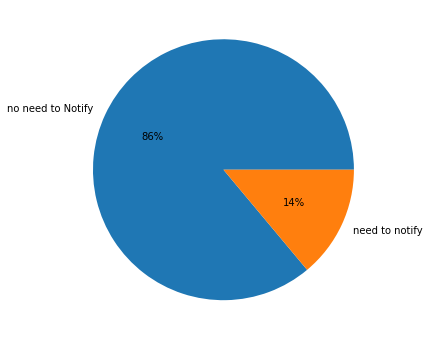

In [413]:
plt.figure(figsize=(8,6))
plt.pie(df_vader_observe["notify"].value_counts(), labels = df_vader_observe["notify"].value_counts().index, autopct="%.0f%%")
plt.show()

# Feature Extraction using TDFIF

In [424]:
#lets perform TDFIF method for textblob data
from sklearn.feature_extraction.text import TfidfVectorizer
vect_tdif=TfidfVectorizer(max_features=100,max_df=0.5,stop_words='english',smooth_idf=True)
doc_tidf=vect_tdif.fit_transform(df_vader['Text'])
naming_features=vect_tdif.get_feature_names()
dense=doc_tidf.todense()
denselist=dense.tolist()
df_vader2=pd.DataFrame(denselist,columns=naming_features)

In [425]:
df_vader2.head()

,aap,able,amazing,android,annoying,app,application,apps,awesome,bad,best,better,browser,button,change,chrome,click,cool,crash,crome,data,day,doe,doesnt,dont,download,easy,excellent,experience,fast,feature,fix,getting,going,good,google,great,group,ha,help,im,issue,ive,just,know,let,like,load,long,love,make,mobile,month,need,new,nice,ok,open,option,page,phone,play,problem,really,say,screen,search,service,site,slow,star,stop,store,suck,super,tab,thank,thanks,thing,time,tried,try,trying,unable,update,updated,updating,use,used,using,version,video,wa,want,way,web,wont,work,working,worst
0,1.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.963554,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.267514,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.000000,0.0,0.0,0.0,0.648023,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.761621,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [426]:
lm=LabelEncoder()
df_vader2["Result"]=lm.fit_transform(df_vader["Result"])
df_vader2.head()

,aap,able,amazing,android,annoying,app,application,apps,awesome,bad,best,better,browser,button,change,chrome,click,cool,crash,crome,data,day,doe,doesnt,dont,download,easy,excellent,experience,fast,feature,fix,getting,going,good,google,great,group,ha,help,im,issue,ive,just,know,let,like,load,long,love,make,mobile,month,need,new,nice,ok,open,option,page,phone,play,problem,really,say,screen,search,service,site,slow,star,stop,store,suck,super,tab,thank,thanks,thing,time,tried,try,trying,unable,update,updated,updating,use,used,using,version,video,wa,want,way,web,wont,work,working,worst,Result
0,1.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
2,0.0,0.963554,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.267514,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,0.0,0.000000,0.0,0.0,0.0,0.648023,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.761621,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
4,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


# Model Building

In [427]:
X=df_vader2.iloc[:,:-1]
X

,aap,able,amazing,android,annoying,app,application,apps,awesome,bad,best,better,browser,button,change,chrome,click,cool,crash,crome,data,day,doe,doesnt,dont,download,easy,excellent,experience,fast,feature,fix,getting,going,good,google,great,group,ha,help,im,issue,ive,just,know,let,like,load,long,love,make,mobile,month,need,new,nice,ok,open,option,page,phone,play,problem,really,say,screen,search,service,site,slow,star,stop,store,suck,super,tab,thank,thanks,thing,time,tried,try,trying,unable,update,updated,updating,use,used,using,version,video,wa,want,way,web,wont,work,working,worst
0,1.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.00000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
1,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.00000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
2,0.0,0.963554,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.00000,0.0,0.0,0.267514,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
3,0.0,0.000000,0.0,0.0,0.0,0.648023,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.761621,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.00000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
4,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.00000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7198,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.00000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
7199,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.684793,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00

In [428]:
Y=df_vader2.iloc[:,-1:]
Y

,Result
0,1
1,2
2,1
3,2
4,0
...,...
7198,1
7199,0
7200,2
7201,2


In [429]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score as ac
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [430]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2)

In [432]:
classifier=LogisticRegression(max_iter=200)
classifier.fit(X_train,y_train)

LogisticRegression(max_iter=200)

In [433]:
y_pred=classifier.predict(X_test)
y_pred

array([2, 1, 1, ..., 1, 1, 1])

In [434]:
ac(y_pred,y_test)

0.8556557945870923

In [449]:
def plot_confusion_matrix(cm, classes, normalize=False,
                         title='Confusion matrix', 
                         cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks=np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    import itertools
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

accuracy:   85.566
Confusion matrix, without normalization
[[ 71  55  32]
 [  8 475   9]
 [  9  95 687]]


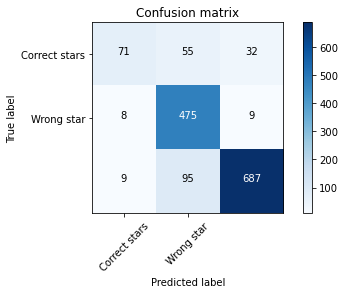

In [450]:
classifier.fit(X_train,y_train)
pred=classifier.predict(X_test)
score=ac(y_test, y_pred)*100
print("accuracy:   %0.3f"% score)
cm=confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, classes=["Correct stars","Wrong star"])


# create a pickle file

In [451]:
import pickle
from pickle import load
from pickle import dump

In [452]:
filename="df.save"
pickle.dump(classifier,open(filename,'wb'))

In [453]:
loaded_model=pickle.load(open("df.save",'rb'))
loaded_model

LogisticRegression(max_iter=200)

In [454]:
df=df_vader2

In [455]:
df.to_csv("df.csv")